In [50]:
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
import pickle
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

In [51]:
trainSet = pickle.load(open( "../Data/trainSet.pkl", "rb" ))
valSet = pickle.load(open( "../Data/valSet.pkl", "rb" ))

In [52]:
trainData, trainLabels = trainSet.tensors[1], trainSet.tensors[0]
valData, valLabels = valSet.tensors[1], valSet.tensors[0]

In [53]:
# average the MFCC for each of the n samples to reduce
# the number of dimensions down to 13 for each sample

# flatten dimensions to n_samples x n_features
trainDataFlat = trainData.mean(2)
trainLabelsFlat = trainLabels.flatten()
valDataFlat = valData.mean(2)
valLabelsFlat = valLabels.flatten()

In [54]:
def train_knn(trainData, trainLabels, valData, valLabels, K=(0, 0), metric="euclidean"):
    # track accuracy of each K
    train_acc, val_acc = [], []

    for i in range(K[0], K[1]+1, 1):
        model = KNeighborsClassifier(n_neighbors=i, metric=metric)
        model.fit(trainData, trainLabels)

        train_acc.append(model.score(trainData, trainLabels))
        val_acc.append(model.score(valData, valLabels))

        print("K={} | train_acc: {}  | val_acc {}".format(i, train_acc[-1], val_acc[-1]))
    return train_acc, val_acc

In [55]:
K = [1, 100]
metric = "euclidean"
train_acc, val_acc = train_knn(trainDataFlat, trainLabelsFlat, valDataFlat, valLabelsFlat, K, metric)

K=1 | train_acc: 0.9996252225241263  | val_acc 0.23241317898486197
K=2 | train_acc: 0.8691089665511103  | val_acc 0.21371326803205698
K=3 | train_acc: 0.8414691277054249  | val_acc 0.20213713268032057
K=4 | train_acc: 0.7655766888410006  | val_acc 0.182546749777382
K=5 | train_acc: 0.7176051719291671  | val_acc 0.1745325022261799
K=6 | train_acc: 0.6620444111308911  | val_acc 0.17275155832591274
K=7 | train_acc: 0.6222243043193104  | val_acc 0.1745325022261799
K=8 | train_acc: 0.5774383959524032  | val_acc 0.163846838824577
K=9 | train_acc: 0.546519254192823  | val_acc 0.1682991985752449
K=10 | train_acc: 0.5264686592335801  | val_acc 0.16562778272484416
K=11 | train_acc: 0.509041506605453  | val_acc 0.16295636687444345
K=12 | train_acc: 0.4961116836878104  | val_acc 0.16918967052537845
K=13 | train_acc: 0.4860863862081889  | val_acc 0.1620658949243099
K=14 | train_acc: 0.4707205096973672  | val_acc 0.16562778272484416
K=15 | train_acc: 0.4654736250351354  | val_acc 0.1682991985752449


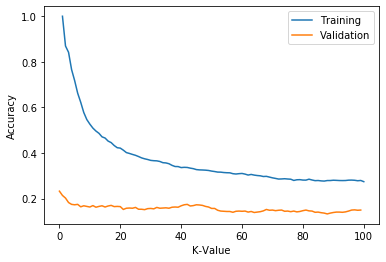

In [56]:
plt.plot(np.arange(K[0], K[1]+1), train_acc, val_acc)
plt.xlabel("K-Value")
plt.ylabel("Accuracy")
plt.legend(["Training", "Validation"])
plt.savefig('knn_euclidean.png', dpi=100)
plt.show()

In [57]:
K = [1, 100]
metric = "manhattan"
train_acc, val_acc = train_knn(trainDataFlat, trainLabelsFlat, valDataFlat, valLabelsFlat, K, metric)

K=1 | train_acc: 0.9996252225241263  | val_acc 0.24220837043633126
K=2 | train_acc: 0.8690152721821418  | val_acc 0.21193232413178986
K=3 | train_acc: 0.8433430150847934  | val_acc 0.20837043633125557
K=4 | train_acc: 0.7765389300103064  | val_acc 0.201246660730187
K=5 | train_acc: 0.7261313595052937  | val_acc 0.1923419412288513
K=6 | train_acc: 0.6679471563759019  | val_acc 0.17186108637577915
K=7 | train_acc: 0.6250351353883632  | val_acc 0.1745325022261799
K=8 | train_acc: 0.5909303850838564  | val_acc 0.16562778272484416
K=9 | train_acc: 0.5588869108966551  | val_acc 0.1647373107747106
K=10 | train_acc: 0.5355570130235173  | val_acc 0.15316117542297417
K=11 | train_acc: 0.5140073081607796  | val_acc 0.1549421193232413
K=12 | train_acc: 0.4998594584465474  | val_acc 0.1549421193232413
K=13 | train_acc: 0.49011524407383117  | val_acc 0.1549421193232413
K=14 | train_acc: 0.4794340860114307  | val_acc 0.1611754229741763
K=15 | train_acc: 0.47315656329054623  | val_acc 0.16206589492430

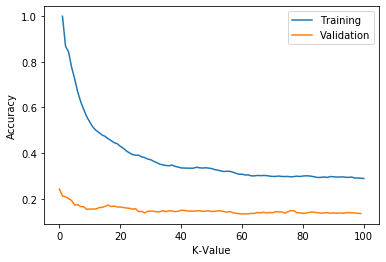

In [58]:
plt.plot(np.arange(K[0], K[1]+1), train_acc, val_acc)
plt.xlabel("K-Value")
plt.ylabel("Accuracy")
plt.legend(["Training", "Validation"])
plt.savefig('knn_manhatton.png', dpi=100)
plt.show()

In [16]:
# best model
modelBest = KNeighborsClassifier(n_neighbors=1, metric="manhattan")

In [17]:
org = {2: [], 10: [], 12: [], 15: [], 17: [], 21: [], 38: []}
classes = list(org.keys())
conf = np.zeros(shape=(len(classes), len(classes))) 

In [41]:
for i in range(len(valLabelsFlat)):
    org[int(valLabelsFlat[i])] = [valDataFlat[j] for j in range(valDataFlat.shape[0]) if valLabelsFlat[j] == valLabelsFlat[i]]
print(valLabelsFlat.shape)
print(valDataFlat.shape)

torch.Size([1123])
torch.Size([1123, 13])


In [75]:
for i in range(len(classes)):
    for j in range(len(classes)):
        idxGuess = classes[j]
        idxAct = classes[i]
        labs = [idxGuess for _ in range(len(org[idxAct]))]
        ins = org[idxAct]
        a = torch.Tensor(len(ins), 13)
        print(a.shape)
        torch.cat(ins, out=a)
        print(a.shape)
        scr = modelBest.score()

        
        

torch.Size([102, 13])
torch.Size([1326])


TypeError: score() missing 2 required positional arguments: 'X' and 'y'